<a href="https://colab.research.google.com/github/ashif1198/CKD_PREDICTION/blob/main/Chronic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #1. Which Simply allows to plot nice charts 2. Matplotlib is an amazing visualization library in Python for 2D plots of arrays
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import io
import graphviz #Graphviz is open-source graph visualization software. Graph visualization is a way of representing structural 
                #information as diagrams of abstract graphs and networks
import seaborn as sns

#uploading and reading dataset

In [ ]:
dataset=pd.read_csv("kidney_disease.csv")
dataset.head(n=10)
#print(dataset)
#print(dataset.columns)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


#displaying data attributes

In [ ]:
dataset.shape

(400, 26)

In [ ]:
print(dataset.columns)

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


# Deleting unnecessary column(s)

In [ ]:
dataset = dataset.drop(['id'],axis=1)
print(dataset.columns)

print(dataset.info())


Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64

# Handling attributes of object type

In [ ]:
obj_cols=[col for col in dataset.columns if dataset[col].dtype=='object']
for col in obj_cols:
    print('-> {}\t:{}'.format(col,dataset[col].unique()))

dataset['pcv'] = pd.to_numeric(dataset['pcv'], errors='coerce')
dataset['wc'] = pd.to_numeric(dataset['wc'], errors='coerce')
dataset['rc'] = pd.to_numeric(dataset['rc'], errors='coerce')

obj_cols=[col for col in dataset.columns if dataset[col].dtype=='object']
for col in obj_cols:
    print('-> {}\t:{}'.format(col,dataset[col].unique()))
    

-> rbc	:[nan 'normal' 'abnormal']
-> pc	:['normal' 'abnormal' nan]
-> pcc	:['notpresent' 'present' nan]
-> ba	:['notpresent' 'present' nan]
-> pcv	:['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
-> wc	:['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100'

# Replacing non-numeric values with numeric values

In [ ]:
dataset[['htn','pe','ane']]=dataset[['htn','pe','ane']].replace(to_replace={'yes':1,'no':0})
dataset[['dm']]=dataset[['dm']].replace(to_replace={'yes':1,'no':0,' yes':1,'\tno':0,'\tyes':1})
dataset[['cad']]= dataset[['cad']].replace(to_replace={'yes':1,'no':0,'\tno':0})
dataset[['rbc','pc']]=dataset[['rbc','pc']].replace(to_replace={'normal':1,'abnormal':0})
dataset[['pcc','ba']]=dataset[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
dataset[['appet']]=dataset[['appet']].replace(to_replace={'good':1,'poor':0})
dataset[['classification']]=dataset[['classification']].replace(to_replace={'ckd':1,'ckd\t':1,'notckd':0})
print(dataset)

print(dataset.dtypes)

      age    bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...   pcv  \
0    48.0  80.0  1.020  1.0  0.0  NaN  1.0  0.0  0.0  121.0  ...  44.0   
1     7.0  50.0  1.020  4.0  0.0  NaN  1.0  0.0  0.0    NaN  ...  38.0   
2    62.0  80.0  1.010  2.0  3.0  1.0  1.0  0.0  0.0  423.0  ...  31.0   
3    48.0  70.0  1.005  4.0  0.0  1.0  0.0  1.0  0.0  117.0  ...  32.0   
4    51.0  80.0  1.010  2.0  0.0  1.0  1.0  0.0  0.0  106.0  ...  35.0   
..    ...   ...    ...  ...  ...  ...  ...  ...  ...    ...  ...   ...   
395  55.0  80.0  1.020  0.0  0.0  1.0  1.0  0.0  0.0  140.0  ...  47.0   
396  42.0  70.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0   75.0  ...  54.0   
397  12.0  80.0  1.020  0.0  0.0  1.0  1.0  0.0  0.0  100.0  ...  49.0   
398  17.0  60.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0  114.0  ...  51.0   
399  58.0  80.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0  131.0  ...  53.0   

         wc   rc  htn   dm  cad  appet   pe  ane  classification  
0    7800.0  5.2  1.0  1.0  0.0    1.0  0.0 

# Count Mean Standard Deviation Minimum Value Maximum Value

In [ ]:
print(dataset.describe().T)

                count         mean          std       min      25%      50%  \
age             391.0    51.483376    17.169714     2.000    42.00    55.00   
bp              388.0    76.469072    13.683637    50.000    70.00    80.00   
sg              353.0     1.017408     0.005717     1.005     1.01     1.02   
al              354.0     1.016949     1.352679     0.000     0.00     0.00   
su              351.0     0.450142     1.099191     0.000     0.00     0.00   
rbc             248.0     0.810484     0.392711     0.000     1.00     1.00   
pc              335.0     0.773134     0.419431     0.000     1.00     1.00   
pcc             396.0     0.106061     0.308305     0.000     0.00     0.00   
ba              396.0     0.055556     0.229351     0.000     0.00     0.00   
bgr             356.0   148.036517    79.281714    22.000    99.00   121.00   
bu              381.0    57.425722    50.503006     1.500    27.00    42.00   
sc              383.0     3.072454     5.741126     

# Plotting Histogram

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95b39f0bb0>


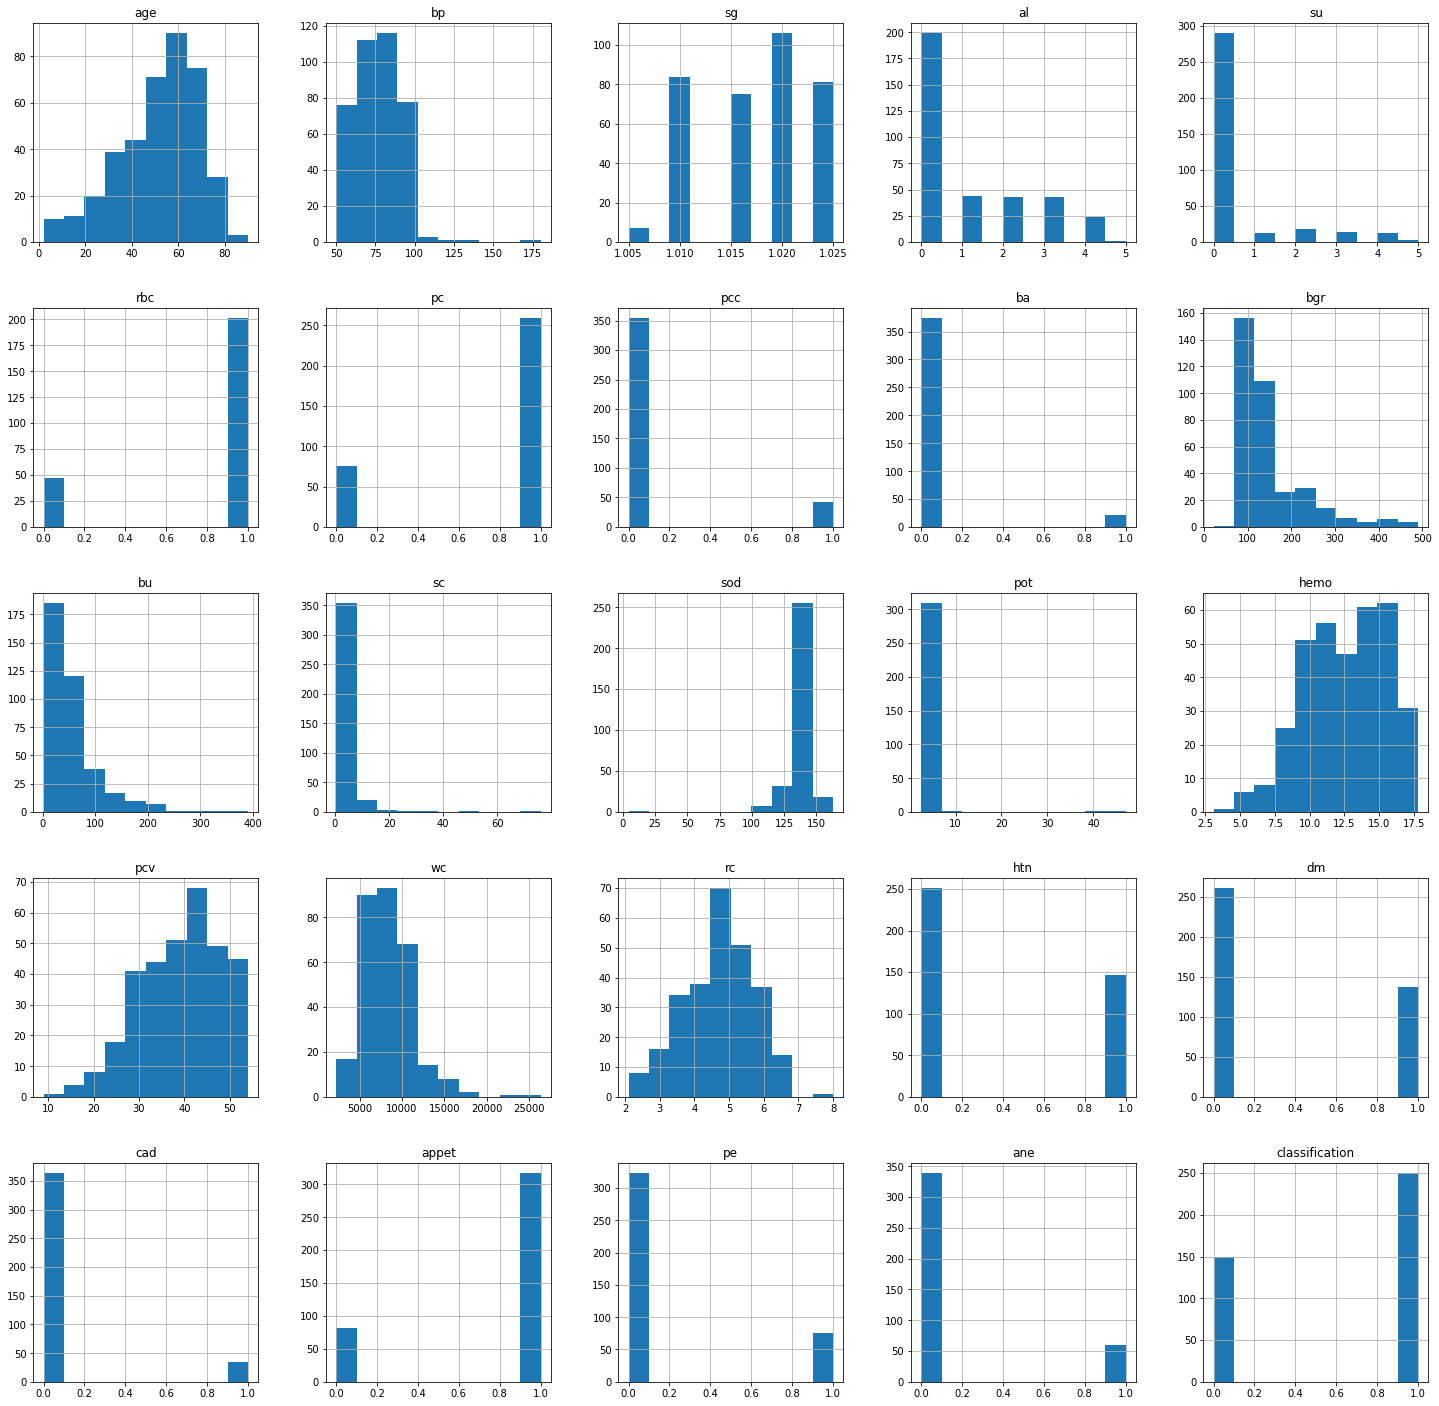

In [ ]:
pt=dataset.hist(figsize=(25,25))
print(pt)

# Count of Null Values

In [ ]:
print(dataset.isnull().sum())
print(dataset.corr())

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64
                     age        bp        sg        al        su       rbc  \
age             1.000000  0.159480 -0.191096  0.122091  0.220866 -0.079987   
bp              0.159480  1.000000 -0.218836  0.160689  0.222576 -0.294129   
sg             -0.191096 -0.218836  1.000000 -0.469760 -0.296234  0.395774   
al              0.122091  0.160689 -0.469760  1.000000  0.269305 -0.437873   
su              0.220866  0.222576 -0.296234  0

# Heatmap is de¦ned as a graphical representation of data using colors to visualize the value of the
# matrix.Used to represent more common values or higher activities brighter colors

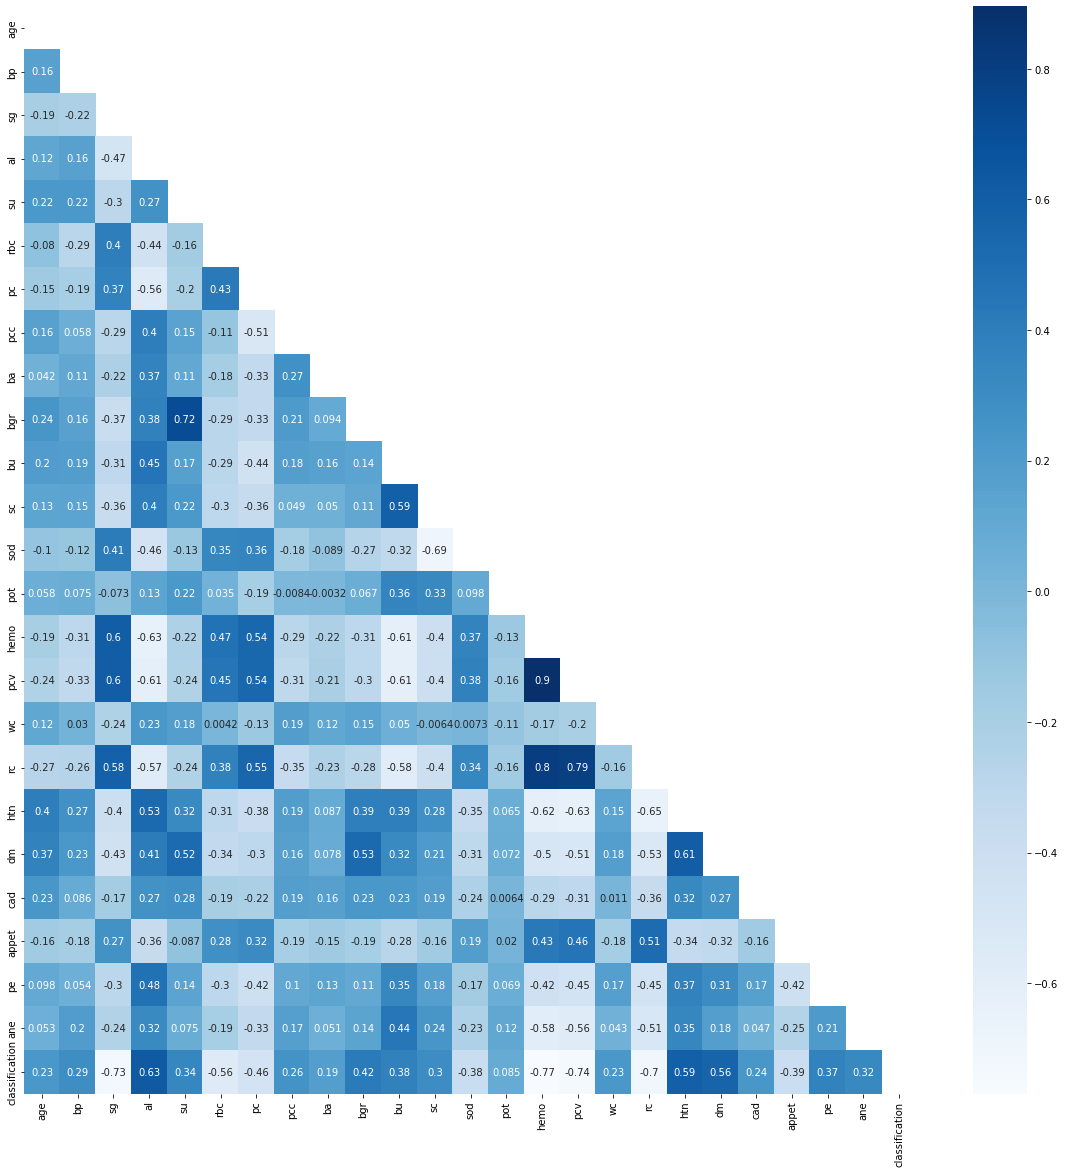

In [ ]:
plt.figure(figsize=(20,20))
matrix=np.triu(dataset.corr())
sns.heatmap(dataset.corr(), annot=True, cmap='Blues', mask=matrix)


# Handling Missing/Null Values

In [ ]:
dataset.isnull().sum()
columns = dataset.columns.to_list()

# Replacing Missing/Null Values with mean values

In [ ]:
dataset['classification'].fillna(value=0,inplace=True)
for i in (columns):
    dataset[i].fillna(dataset[i].mean(),inplace=True)
    
print(dataset.isnull().sum())

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


# Feature Selection


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ind_col=[col for col in dataset.columns if col!='classification']
dep_col='classification'

x=dataset[ind_col]
y=dataset[dep_col]

ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(x,y)
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(x.columns)
features_rank=pd.concat([dfcolumns,datascores],axis=1)
features_rank.columns=['Features','Score']

# Fetch largest 10 values of Score column

In [ ]:
selected_columns=features_rank.nlargest(10,'Score')['Features'].values
X_new=dataset[selected_columns]
dataset = pd.concat([X_new, y], axis=1)
selected_columns
print(dataset)

         wc         bgr    bu   sc   pcv   al  hemo   age   su  htn  \
0    7800.0  121.000000  36.0  1.2  44.0  1.0  15.4  48.0  0.0  1.0   
1    6000.0  148.036517  18.0  0.8  38.0  4.0  11.3   7.0  0.0  0.0   
2    7500.0  423.000000  53.0  1.8  31.0  2.0   9.6  62.0  3.0  0.0   
3    6700.0  117.000000  56.0  3.8  32.0  4.0  11.2  48.0  0.0  1.0   
4    7300.0  106.000000  26.0  1.4  35.0  2.0  11.6  51.0  0.0  0.0   
..      ...         ...   ...  ...   ...  ...   ...   ...  ...  ...   
395  6700.0  140.000000  49.0  0.5  47.0  0.0  15.7  55.0  0.0  0.0   
396  7800.0   75.000000  31.0  1.2  54.0  0.0  16.5  42.0  0.0  0.0   
397  6600.0  100.000000  26.0  0.6  49.0  0.0  15.8  12.0  0.0  0.0   
398  7200.0  114.000000  50.0  1.0  51.0  0.0  14.2  17.0  0.0  0.0   
399  6800.0  131.000000  18.0  1.1  53.0  0.0  15.8  58.0  0.0  0.0   

     classification  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
..             

# Histogram

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95ae6fc520>


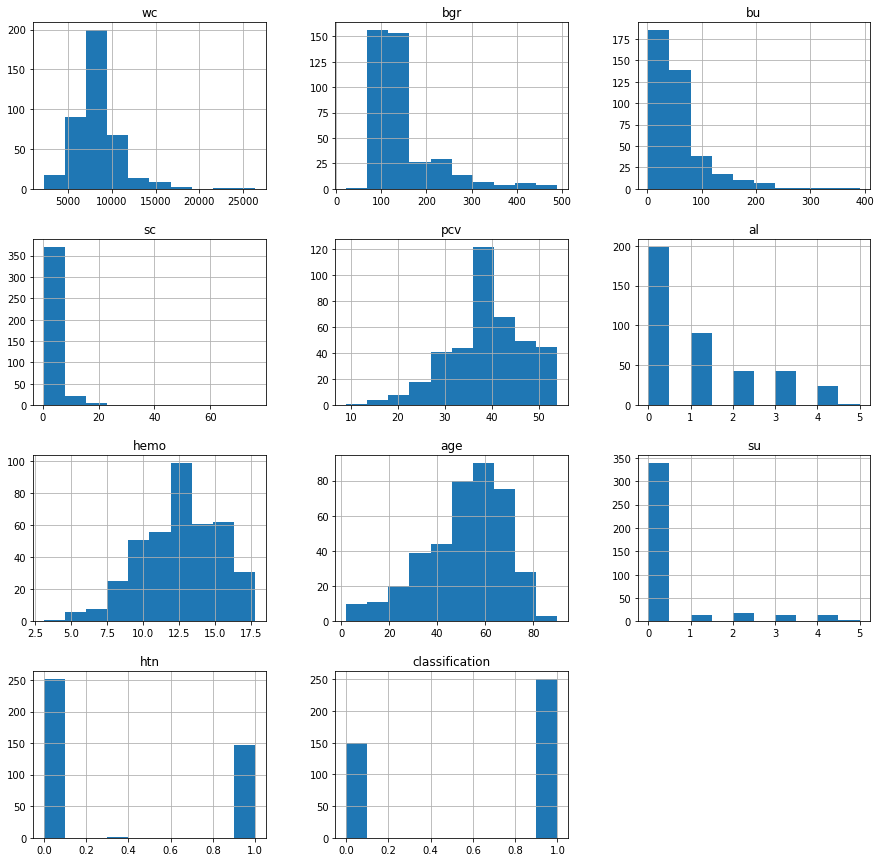

In [ ]:
pt=dataset.hist(figsize=(15,15))
print(pt)

#Heatmap

#corelation
The lighter the color the more it will be corelation.
corelation between two independent variable would be a problem in dataset

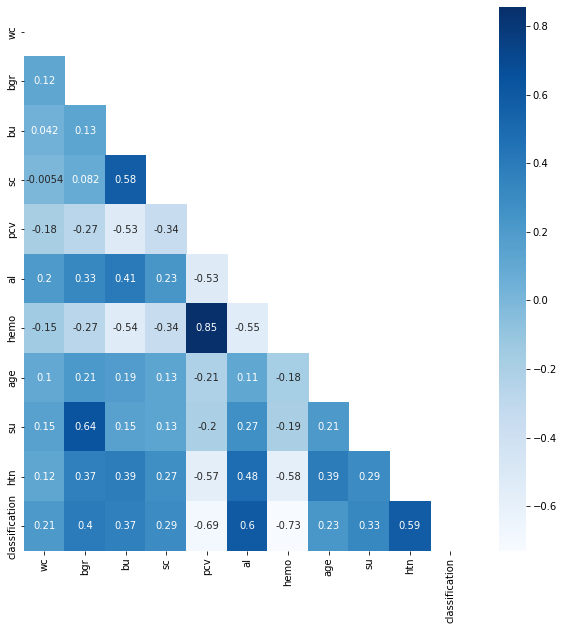

In [ ]:
plt.figure(figsize=(10,10))
matrix=np.triu(dataset.corr())
sns.heatmap(dataset.corr(),annot=True,cmap='Blues', mask=matrix)

# Shuffling the data

In [ ]:
from sklearn.utils import shuffle
dataset=shuffle(dataset)
print(dataset)

               wc         bgr     bu    sc        pcv        al       hemo  \
296   6300.000000  125.000000   38.0   0.6  41.000000  0.000000  16.800000   
222   8406.122449  108.000000   68.0   1.8  38.884498  1.016949  12.526437   
373   9200.000000  133.000000   38.0   1.0  47.000000  0.000000  13.700000   
394   9500.000000  137.000000   46.0   0.8  45.000000  0.000000  14.100000   
22    6900.000000   95.000000  163.0   7.7  32.000000  4.000000   9.800000   
..            ...         ...    ...   ...        ...       ...        ...   
332  10500.000000  148.036517   33.0   1.0  44.000000  0.000000  15.300000   
352   7000.000000  109.000000   47.0   1.1  48.000000  0.000000  15.000000   
154   8406.122449  242.000000  132.0  16.4  26.000000  4.000000   8.400000   
355   6300.000000   95.000000   24.0   0.8  52.000000  0.000000  15.000000   
202   8406.122449  114.000000   74.0   2.9  24.000000  1.016949   8.000000   

      age        su  htn  classification  
296  41.0  0.000000 

# Preparing data for modelling

In [ ]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


# Test-Train Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
print(x_train.shape,x_test.shape)



(280, 10) (120, 10)


# Decision Tree Classi¦er

In [ ]:
dtree=DecisionTreeClassifier(max_depth=7,criterion='entropy')
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
print("\n\n\t DECISION TREE CLASSIFIER\n")
print("\nAccuracy Score :", accuracy_score(y_test, y_pred))
print("classification report is:\n",classification_report(y_test,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))



	 DECISION TREE CLASSIFIER


Accuracy Score : 0.925
classification report is:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90        42
           1       0.99      0.90      0.94        78

    accuracy                           0.93       120
   macro avg       0.91      0.94      0.92       120
weighted avg       0.93      0.93      0.93       120

Confusion matrix:
 [[41  1]
 [ 8 70]]


# KNN Classi¦er

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred2=knn.predict(x_test)
print("\n\n\t K NEAREST NEIGHBOR CLASSIFIER\n")
print("\nAccuracy Score :", accuracy_score(y_test, pred2))
print("classification report is::\n",classification_report(y_test,pred2))
print("confusion matrix:\n",confusion_matrix(y_test,pred2))



	 K NEAREST NEIGHBOR CLASSIFIER


Accuracy Score : 0.675
classification report is::
               precision    recall  f1-score   support

           0       0.53      0.74      0.61        42
           1       0.82      0.64      0.72        78

    accuracy                           0.68       120
   macro avg       0.67      0.69      0.67       120
weighted avg       0.72      0.68      0.68       120

confusion matrix:
 [[31 11]
 [28 50]]


#SVM Classifier

In [ ]:
from sklearn.svm import SVC
svc_model=SVC(C=70)
svc_model.fit(x_train,y_train)
pred3=svc_model.predict(x_test)
print("\n\n\t SUPPORT VECTOR MACHINE CLASSIFIER\n")
print("\nAccuracy Score :", accuracy_score(y_test, pred3))
print("classification report is::\n",classification_report(y_test,pred3))
print("confusion matrix:\n",confusion_matrix(y_test,pred3))




	 SUPPORT VECTOR MACHINE CLASSIFIER


Accuracy Score : 0.7333333333333333
classification report is::
               precision    recall  f1-score   support

           0       0.66      0.50      0.57        42
           1       0.76      0.86      0.81        78

    accuracy                           0.73       120
   macro avg       0.71      0.68      0.69       120
weighted avg       0.72      0.73      0.72       120

confusion matrix:
 [[21 21]
 [11 67]]


#Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100,criterion='entropy')
rf.fit(x_train,y_train)
pred4= rf.predict(x_test)
print("\n\n\t RANDOM FOREST CLASSIFIER\n")
print("\nAccuracy Score :", accuracy_score(y_test, pred4))
print("classification report is::\n",classification_report(y_test,pred4))
print("confusion matrix:\n",confusion_matrix(y_test,pred4))




	 RANDOM FOREST CLASSIFIER


Accuracy Score : 0.975
classification report is::
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        42
           1       1.00      0.96      0.98        78

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

confusion matrix:
 [[42  0]
 [ 3 75]]


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',multi_class='ovr')
logreg.fit(x_train, y_train)
pred5 = logreg.predict(x_test)
print("\n\n\t LOGISTIC REGRESSION CLASSIFIER\n")
print("\nAccuracy Score :", accuracy_score(y_test, pred5))
print("classification report is::\n",classification_report(y_test,pred5))
print("confusion matrix:\n",confusion_matrix(y_test,pred5))




	 LOGISTIC REGRESSION CLASSIFIER


Accuracy Score : 0.95
classification report is::
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        42
           1       0.99      0.94      0.96        78

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.95      0.95      0.95       120

confusion matrix:
 [[41  1]
 [ 5 73]]


# GAUSSIAN NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
pred6 = gaussian.predict(x_test)
print("\n\n\t GAUSSIAN NAIVE BAYES CLASSIFIER\n")
print("\nAccuracy Score :", accuracy_score(y_test, pred6))
print("classification report is::\n",classification_report(y_test,pred6))
print("confusion matrix:\n",confusion_matrix(y_test,pred6))



	 GAUSSIAN NAIVE BAYES CLASSIFIER


Accuracy Score : 0.9583333333333334
classification report is::
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        42
           1       1.00      0.94      0.97        78

    accuracy                           0.96       120
   macro avg       0.95      0.97      0.96       120
weighted avg       0.96      0.96      0.96       120

confusion matrix:
 [[42  0]
 [ 5 73]]


# Ada Boost Classi¦er

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
pred7 = ada.predict(x_test)
print("\n\n\t ADA BOOST CLASSIFIER\n")
print("\nAccuracy Score :", accuracy_score(y_test, pred7))
print("classification report is::\n",classification_report(y_test,pred7))
print("confusion matrix:\n",confusion_matrix(y_test,pred7))



	 ADA BOOST CLASSIFIER


Accuracy Score : 0.9916666666666667
classification report is::
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.99      0.99        78

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

confusion matrix:
 [[42  0]
 [ 1 77]]


#Conclusion

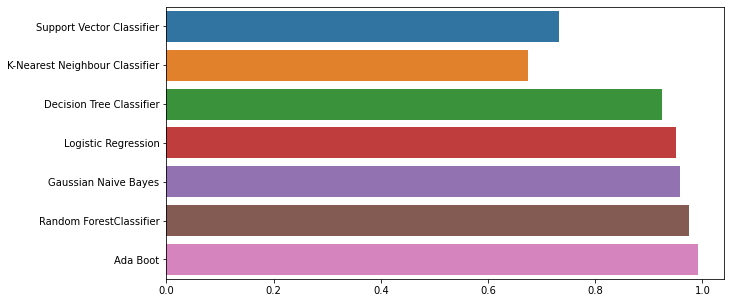

                            model     score
0       Support Vector Classifier  0.733333
1  K-Nearest Neighbour Classifier  0.675000
2        Decision Tree Classifier  0.925000
3             Logistic Regression  0.950000
4            Gaussian Naive Bayes  0.958333
5         Random ForestClassifier  0.975000
6                        Ada Boot  0.991667


In [ ]:
dcc=accuracy_score(y_test,y_pred)
knnc=accuracy_score(y_test,pred2)
svmc=accuracy_score(y_test,pred3)
rfc=accuracy_score(y_test,pred4)
lgr= accuracy_score(y_test, pred5)
gnb= accuracy_score(y_test, pred6)
abc=accuracy_score(y_test, pred7)

models=['Support Vector Classifier','K-Nearest Neighbour Classifier','Decision Tree Classifier', 'Logistic Regression','Gaussian Naive Bayes', 'Random ForestClassifier', 'Ada Boot'] 
scores=[svmc,knnc,dcc, lgr, gnb, rfc, abc]

plt.figure(figsize=(10,5))
sns.barplot(x=scores, y=models)
plt.show()

score_table=pd.DataFrame({'model':models,'score':scores})
score_table.sort_values(by='score',axis=0,ascending=True)

print(score_table)

#Saving the model

In [ ]:
import pickle
saved_model = pickle.dumps(ada)
ada_from_pickle = pickle.loads(saved_model)
print(ada_from_pickle.predict(x_test))


[0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1
 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0
 1 1 1 1 1 1 1 1 1]


# Testing The Model

# Patient No. 238

In [ ]:
pre = ada.predict([[8406.122449, 201.0, 241.000000, 13.400000, 28.000000, 1.016949, 9.400000, 72.0, 0.450142, 1.0]])
if pre == 1:
    print("Patient has CKD")
else:
    print("Patient does not have CKD")

Patient has CKD


#patient no. 78

In [ ]:
pre = ada.predict([[8300.000000, 360.0, 19.000000, 0.700000, 44.000000, 0.000000, 15.200000, 61.0, 4.0, 1.0]])
if pre == 1:
    print("Patient has CKD")
else:
    print("Patient does not have CKD")

Patient has CKD


#Patient no. 362

In [ ]:
pre = ada.predict([[10300.000000, 89.0, 19.000000, 1.100000, 40.000000, 0.000000, 15.000000, 33.0, 0.000000, 0.0]])
if pre == 1:
    print("Patient has CKD")
else:
    print("Patient does not have CKD")

Patient does not have CKD
